## Feature selection

Why would it even be necessary to select features? To some, this idea may seem counterintuitive, but there are at least two important reasons to get rid of unimportant features. The first is clear to every engineer: the more data, the higher the computational complexity. As long as we work with toy datasets, the size of the data is not a problem, but, for real loaded production systems, hundreds of extra features will be quite tangible. The second reason is that some algorithms take noise (non-informative features) as a signal and overfit.

### Statistical approaches

The most obvious candidate for removal is a feature whose value remains unchanged, i.e., it contains no information at all. If we build on this thought, it is reasonable to say that features with low variance are worse than those with high variance. So, one can consider cutting features with variance below a certain threshold.

#### Basado en estadísticos no supervisado

In [1]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification #'make_classification' es un método para generar data_set_ficticio

In [2]:
x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

(100, 20)

In [3]:
np.var(x_data_generated, axis=0)

array([1.42849746, 0.94489482, 1.0477005 , 0.79393126, 0.89324352,
       1.13581547, 1.02213154, 1.01600963, 1.00081742, 1.54055472,
       1.23233809, 0.87762711, 1.13837139, 1.01645423, 0.42312016,
       1.07453141, 0.98610704, 0.82601013, 1.15709032, 1.00643506])

In [4]:
np.var(x_data_generated, axis=0).shape

(20,)

In [5]:
np.sort(np.var(x_data_generated, axis=0)).reshape(-1,1)

array([[0.42312016],
       [0.79393126],
       [0.82601013],
       [0.87762711],
       [0.89324352],
       [0.94489482],
       [0.98610704],
       [1.00081742],
       [1.00643506],
       [1.01600963],
       [1.01645423],
       [1.02213154],
       [1.0477005 ],
       [1.07453141],
       [1.13581547],
       [1.13837139],
       [1.15709032],
       [1.23233809],
       [1.42849746],
       [1.54055472]])

In [6]:
VarianceThreshold(.7).fit_transform(x_data_generated).shape
#una varianza menor de 0'7, se borra la variable. Se hace una limpieza de Features previa

#OJO!! Hay que tener en cuenta que para hacer uso de la clase VarianceThreshold, habría que estandatizar(media=0, varienza=1)
#Si se escala (valores se encuentran 0 y 1)

(100, 19)

In [7]:
VarianceThreshold(.85).fit_transform(x_data_generated).shape

(100, 17)

In [8]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

(100, 15)

#### Basado en estadísticos supervisado

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)
x_data_varth = VarianceThreshold(0.9).fit_transform(x_data_generated)

In [10]:
x_data_kbest.shape

(100, 5)

In [11]:
x_data_kbest

array([[ 0.70378302, -1.39937722, -0.88526277, -0.88821684,  0.56129588],
       [ 1.87154696, -1.01616393, -0.5839899 ,  0.07639845,  0.61192017],
       [ 0.09592054, -0.98474312, -0.5606487 ,  0.95381882,  0.61134507],
       [ 0.49667996, -2.45438559, -1.23174534,  0.24291777,  2.09880346],
       [ 1.32031528, -0.05211482,  0.04868764,  0.32475261,  0.30443283],
       [-1.76320384,  2.44829644,  1.28923466,  0.46666773, -1.88336922],
       [-1.87392421, -0.73340461, -0.36083784, -0.45644395,  0.65223803],
       [-0.64443184,  2.92869813,  1.43797758, -0.38432912, -2.6148298 ],
       [-1.58949085,  0.59878161,  0.37356932, -0.30623931, -0.25832342],
       [ 1.32670639, -0.85463952, -0.45612181,  0.5523502 ,  0.63631934],
       [-0.25618015, -0.43159565, -0.28975551,  1.06916877,  0.11504876],
       [-0.60811652,  0.4974213 ,  0.31791054, -1.94438623, -0.18828197],
       [ 0.91524602, -0.60895282, -0.25111087, -1.27819478,  0.70994982],
       [-2.0644846 ,  0.6571867 ,  0.4

In [12]:
x_data_kbest[0,:]

array([ 0.70378302, -1.39937722, -0.88526277, -0.88821684,  0.56129588])

In [13]:
"""

# Create and fit selector
selector = SelectKBest(f_classif, k=5)
selector.fit(features_df, target)
cols = selector.get_support(indices= True)
features_df_new = features_df.iloc[:,cols]

"""
selector = SelectKBest(f_classif, k=5).fit(x_data_generated, y_data_generated)
cols = selector.get_support(indices=True)
features_new = x_data_generated[:,cols]
features_new.shape

(100, 5)

In [14]:
logit = LogisticRegression(solver= 'lbfgs', random_state= 17)

In [ ]:
cross_val_score()

In [15]:
"""
#Es lo mismo que 'LeaveOneOut' realizar cross_validation con to todas los registros
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn-model-selection-leaveoneout
cross_val_score(logit, x_data_generated, y_data_generated,
                scoring= 'neg_log_loss', cv=x_data_generated.shape[0]) 

"""


"\n#Es lo mismo que 'LeaveOneOut' realizar cross_validation con to todas los registros\n#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn-model-selection-leaveoneout\ncross_val_score(logit, x_data_generated, y_data_generated,\n                scoring= 'neg_log_loss', cv=x_data_generated.shape[0]) \n\n"

In [16]:
#'Estratificado' en CrossValidation, buscas que las muestras cojan la misma proporcion de cada clase.
#Esto se hace cuando las clases no están balanceadas
#https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation#:~:text=In%20stratified%20k%2Dfold%20cross,two%20types%20of%20class%20labels.

We can see that our selected features have improved the quality of the classifier. Of course, this example is purely artificial; however, it is worth using for real problems.

### Selection by modeling

Another approach is to use some baseline model for feature evaluation because the model will clearly show the importance of the features. Two types of models are usually used: some “wooden” composition such as [Random Forest](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-5-ensembles-of-algorithms-and-random-forest-8e05246cbba7) or a linear model with Lasso regularization so that it is prone to nullify weights of weak features. The logic is intuitive: if features are clearly useless in a simple model, there is no need to drag them to a more complex one.

#### Supervisado intrinseco

In [17]:
# Synthetic example

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_data_generated, y_data_generated = make_classification()

rf = RandomForestClassifier(n_estimators=10, random_state=17)
pipe = make_pipeline(SelectFromModel(estimator=rf), logit) 
#SelectFromModel == te apoyarse la importantes de las features que genera 'randomForest' y las aplicas a la regresión  logistica

print(cross_val_score(logit, x_data_generated, y_data_generated, 
                      scoring='neg_log_loss', cv=5).mean())
print(cross_val_score(rf, x_data_generated, y_data_generated, 
                      scoring='neg_log_loss', cv=5).mean())
print(cross_val_score(pipe, x_data_generated, y_data_generated, 
                      scoring='neg_log_loss', cv=5).mean())

-0.49541727863468343
-0.6435593115768066
-0.37440738608407287


We must not forget that this is not a silver bullet again - it can make the performance worse.

In [18]:
from sklearn.preprocessing import StandardScaler

#x_data, y_data = get_data() 
x_data = x_data_generated
y_data = y_data_generated

pipe1 = make_pipeline(StandardScaler(), 
                      SelectFromModel(estimator=rf), logit)

pipe2 = make_pipeline(StandardScaler(), logit)

print('LR + selection: ', cross_val_score(pipe1, x_data, y_data, 
                                          scoring='neg_log_loss', cv=5).mean())
print('LR: ', cross_val_score(pipe2, x_data, y_data, 
                              scoring='neg_log_loss', cv=5).mean())
print('RF: ', cross_val_score(rf, x_data, y_data, 
                              scoring='neg_log_loss', cv=5).mean())

LR + selection:  -0.37795395563649065
LR:  -0.49764118189742446
RF:  -0.6435593115768066


#### Supervisado wrapper

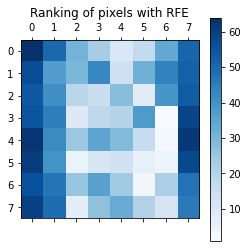

In [28]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1) 
#RFE es otra forma de exploración de features, es ir contrastando métricas si se elimina cada una de las columnas
#Si el score no cambia, o cambia muy poco, se elimina del conjunto de 'features' que tiene el dataset

rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.tight_layout()
plt.show();

#Mustra la posición del rankin de importancia de las features(pixeles 8x8)

In [29]:
ranking

array([[64, 50, 31, 23, 10, 17, 34, 51],
       [57, 37, 30, 43, 14, 32, 44, 52],
       [54, 41, 19, 15, 28,  8, 39, 53],
       [55, 45,  9, 18, 20, 38,  1, 59],
       [63, 42, 25, 35, 29, 16,  2, 62],
       [61, 40,  5, 11, 13,  6,  4, 58],
       [56, 47, 26, 36, 24,  3, 22, 48],
       [60, 49,  7, 27, 33, 21, 12, 46]])

In [20]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit_transform(X, y)

array([[ 9., 11., 12., ...,  7., 12.,  6.],
       [13.,  6., 15., ...,  0.,  6.,  0.],
       [15., 16.,  1., ...,  0., 11.,  0.],
       ...,
       [15., 16.,  8., ...,  0., 16.,  2.],
       [ 7., 16., 16., ...,  2., 16.,  5.],
       [ 8., 15.,  5., ...,  6., 16.,  8.]])